Missing values:
 age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

Basic Stats:
                age  resting_blood_pressure  cholestoral  Max_heart_rate  \
count  1025.000000             1025.000000   1025.00000     1025.000000   
mean     54.434146              131.611707    246.00000      149.114146   
std       9.072290               17.516718     51.59251       23.005724   
min      29.000000               94.000000    126.00000       71.000000   
25%      48.000000              120.000000    211.00000      132.000000   
50%      56.000

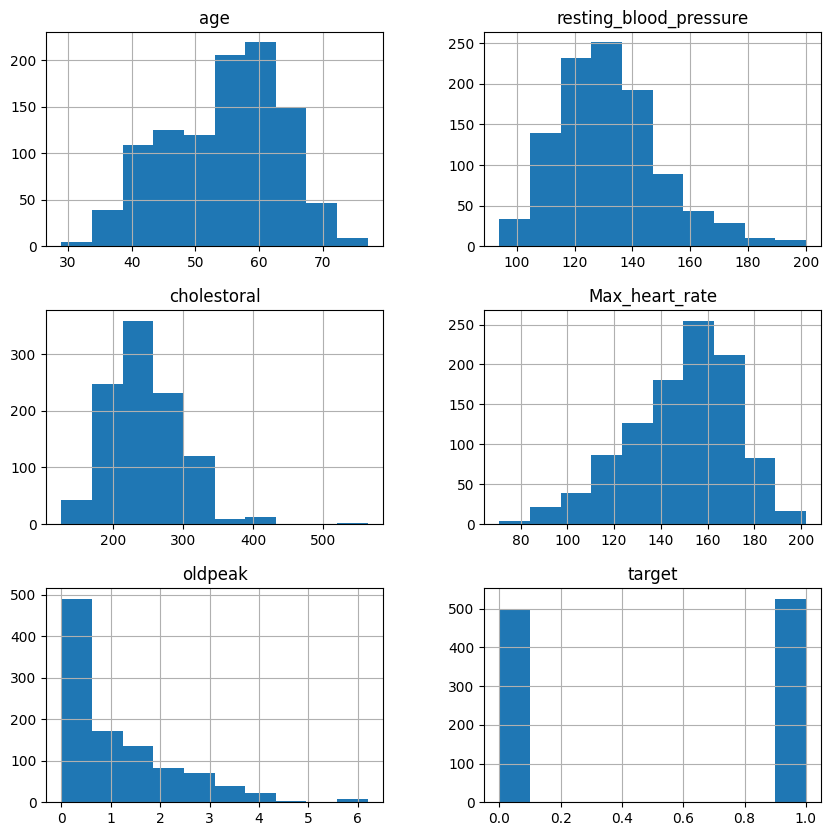

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

data = pd.read_csv("/content/HeartDiseaseTrain-Test.csv")

print("Missing values:\n", data.isnull().sum())
print("\nBasic Stats:\n", data.describe())
print("\nClass Distribution:\n", data['target'].value_counts())

data.hist(figsize=(10, 10))
plt.show()

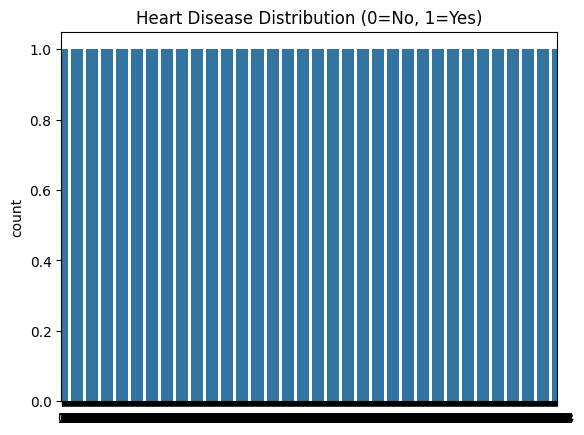

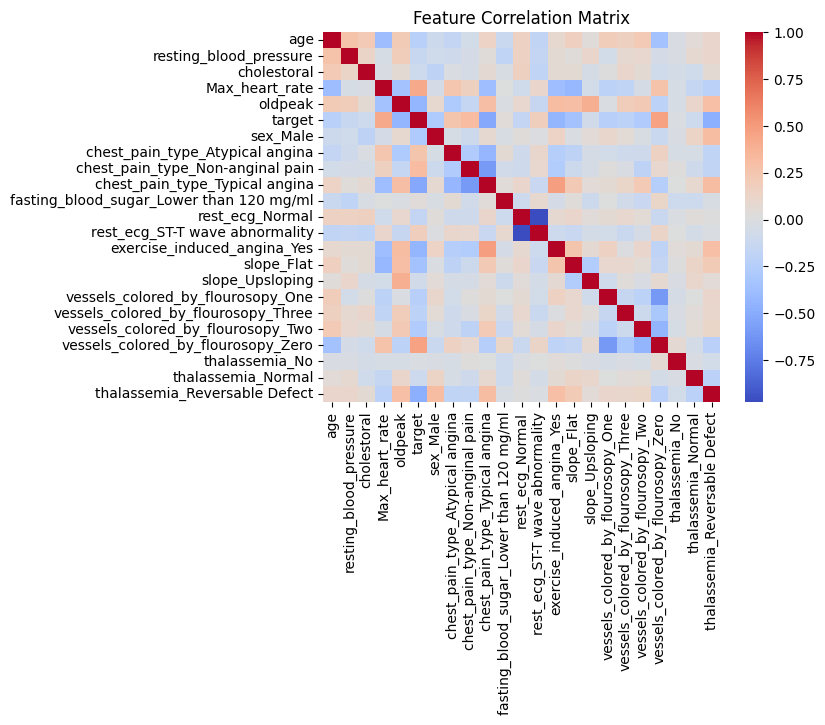

In [ ]:
sns.countplot(data['target'])
plt.title("Heart Disease Distribution (0=No, 1=Yes)")
plt.show()

numeric_data = data.select_dtypes(include=np.number)
categorical_cols = data.select_dtypes(include='object').columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

sns.heatmap(data_encoded.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

X = data_encoded.drop("target", axis=1)
y = data_encoded["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)
log_probs = log_model.predict_proba(X_test_scaled)[:, 1]

tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)
tree_probs = tree_model.predict_proba(X_test)[:, 1]

def evaluate_model(name, y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    fpr, tpr, _ = roc_curve(y_true, y_prob)

    print(f"\n{name} Accuracy: {acc:.4f}")
    print(f"{name} Confusion Matrix:\n", cm)
    print(f"{name} ROC-AUC: {roc_auc:.4f}")

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{name} AUC = {roc_auc:.2f}")

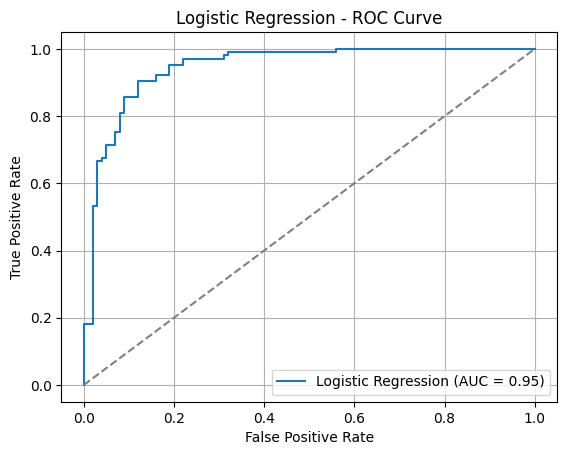

In [ ]:
acc = accuracy_score(y_test, log_preds)
cm = confusion_matrix(y_test, log_preds)
roc_auc = roc_auc_score(y_test, log_probs)
fpr, tpr, _ = roc_curve(y_test, log_probs)

plt.figure()
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression - ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


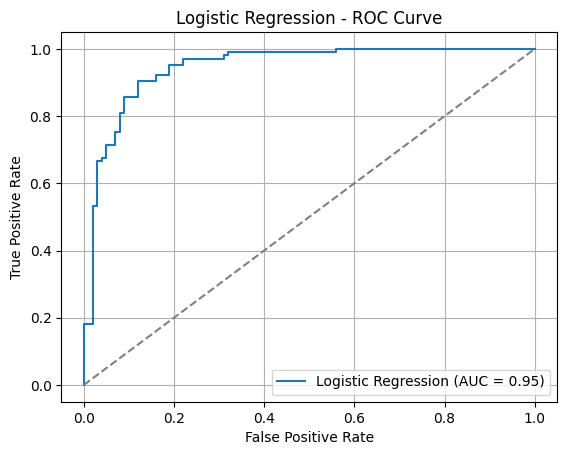


Logistic Regression Accuracy: 0.8732
Logistic Regression Confusion Matrix:
 [[84 16]
 [10 95]]
Logistic Regression ROC-AUC: 0.9454


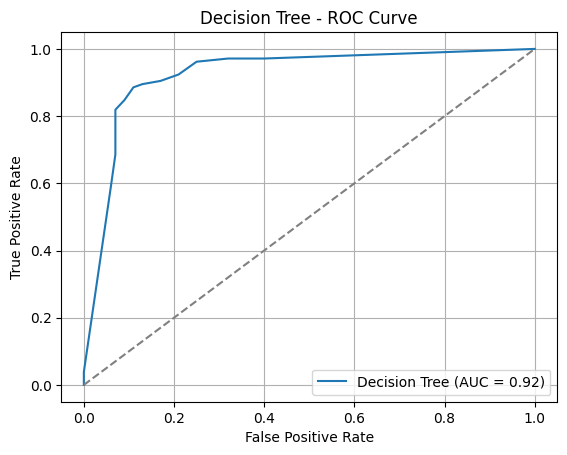


Decision Tree Accuracy: 0.8878
Decision Tree Confusion Matrix:
 [[89 11]
 [12 93]]
Decision Tree ROC-AUC: 0.9241


In [ ]:
def evaluate_model(name, y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    fpr, tpr, _ = roc_curve(y_true, y_prob)

    plt.figure()
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} - ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\n{name} Accuracy: {acc:.4f}")
    print(f"{name} Confusion Matrix:\n", cm)
    print(f"{name} ROC-AUC: {roc_auc:.4f}")
evaluate_model("Logistic Regression", y_test, log_preds, log_probs)
evaluate_model("Decision Tree", y_test, tree_preds, tree_probs)

